<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/5_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D1%8F%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Методы регуляризации и оптимизации в нейронных сетях

#1. **Дропаут (Dropout)**  
Дропаут — это метод регуляризации, используемый в нейронных сетях для предотвращения переобучения. Идея метода заключается в случайном "отключении" (занулении) части нейронов во время обучения с определённой вероятностью $p$. Это позволяет снизить коадаптацию нейронов, то есть их чрезмерную зависимость друг от друга, что способствует повышению обобщающей способности модели.  

а) **Прямой и обратный проход через линейный слой с Dropout**  
Рассмотрим линейный слой с функцией активации $f$. Пусть на вход подаётся наблюдение $h_1$ размерности $[1 \times d]$. Тогда выход слоя вычисляется по формуле:  
$$
h_2 = f(h_1 \cdot W + b),
$$  
где $W$ — матрица весов размерности $[d \times k]$, $b$ — вектор смещений размерности $[1 \times k]$, а $h_2$ — выходной вектор размерности $[1 \times k]$.  

Для применения дропаута каждый нейрон отключается с вероятностью $p$. Это реализуется путём поэлементного умножения выходного вектора $h_2$ на вектор $d$ размерности $[1 \times k]$, где каждый элемент $d_j$ имеет распределение Бернулли:  
$$
d_j =
\begin{cases}
0, & \text{с вероятностью } p, \\
1, & \text{с вероятностью } 1 - p.
\end{cases}
$$  
Обозначив поэлементное умножение через $\odot$, получим:  
$$
h_2 = d \odot f(h_1 \cdot W + b).
$$  
Если на вход подаётся матрица $H_1$ размерности $[n \times d]$, то выход слоя с дропаутом вычисляется как:  
$$
H_2 = D \odot f(H_1 \cdot W + b),
$$  
где $D$ — матрица размерности $[n \times k]$, состоящая из нулей и единиц, сгенерированных по распределению Бернулли.  

Без дропаута шаг обратного распространения ошибки (backpropagation) выглядит следующим образом:  
$$
\frac{\partial L}{\partial H_1} = \frac{\partial L}{\partial H_2} \cdot W^T \odot f'(H_1 \cdot W + b),
$$  
где $\frac{\partial L}{\partial H_1}$ — градиент по входу слоя, $\frac{\partial L}{\partial H_2}$ — градиент по выходу слоя, а $f'$ — производная функции активации.  

Для слоя с дропаутом шаг обратного распространения ошибки модифицируется следующим образом:  
$$
\frac{\partial L}{\partial H_1} = \frac{\partial L}{\partial H_2} \cdot W^T \odot f'(H_1 \cdot W + b) \odot D.
$$  
Таким образом, градиенты по отключённым нейронам зануляются, и сеть игнорирует их при обновлении параметров.  

Производная по весам слоя вычисляется как:  
$$
\frac{\partial L}{\partial W} = H_1^T \cdot \frac{\partial L}{\partial H_1},
$$  
и именно на эту величину выполняется шаг градиентного спуска.  

б) **Роль Dropout в предотвращении переобучения**  
Дропаут помогает бороться с переобучением за счёт предотвращения коадаптации нейронов. При обучении случайное отключение части нейронов приводит к тому, что оставшиеся нейроны вынуждены учиться более независимо, что снижает риск переобучения на конкретных признаках.  

Кроме того, дропаут можно интерпретировать как усреднение множества различных моделей, получаемых путём случайного отключения нейронов. Это эквивалентно обучению ансамбля из $2^N$ моделей, где $N$ — количество нейронов, которые могут быть отключены.  

в) **Применение Dropout на этапе тестирования**  
На этапе тестирования дропаут не применяется, так как это может привести к нестабильности предсказаний. Вместо этого используется масштабирование выходов нейронов на коэффициент $1 - p$, чтобы сохранить ожидаемое значение выхода.  

Рассмотрим пример с двумя нейронами, каждый из которых отключается с вероятностью $0.4$.




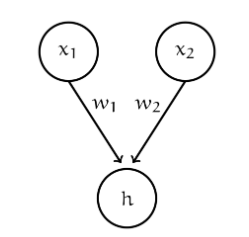

 Пусть выходы нейронов равны $x_1$ и $x_2$, а их веса — $w_1$ и $w_2$. Тогда ожидаемое значение выхода $h$ вычисляется как:  
$$
E(h) = 0.6 \cdot 0.6 \cdot (w_1 \cdot x_1 + w_2 \cdot x_2) + 0.6 \cdot 0.4 \cdot (w_1 \cdot x_1) + 0.4 \cdot 0.6 \cdot (w_2 \cdot x_2) + 0.4 \cdot 0.4 \cdot 0 = 0.6 \cdot (w_1 \cdot x_1 + w_2 \cdot x_2).
$$  
Таким образом, для получения корректного результата на этапе тестирования достаточно умножить выходы нейронов на $0.6$.  

г) **Обратный дропаут (Inverted Dropout)**  
Обратный дропаут — это модификация метода, при которой выходы нейронов на этапе обучения масштабируются на коэффициент $\frac{1}{1 - p}$. Это позволяет избежать необходимости масштабирования на этапе тестирования. Прямой проход при обратном дропауте выглядит следующим образом:  
$$
H_2 = \frac{1}{1 - p} \cdot D \odot f(H_1 \cdot W + b).
$$  
При этом на этапе тестирования выходы нейронов используются без дополнительного масштабирования:  
$$
H_2 = f(H_1 \cdot W + b).
$$  
Такой подход упрощает реализацию и снижает вероятность ошибок при переходе между этапами обучения и тестирования.


д) **Шаг градиентного спуска для линейного слоя с обратным дропаутом и без него**  
Для линейного слоя без дропаута производная по весам $W$ вычисляется следующим образом:  
$$
\frac{\partial L}{\partial W} = H_1^T \cdot \frac{\partial L}{\partial H_1},
$$  
где $H_1$ — входные данные, $\frac{\partial L}{\partial H_1}$ — градиент по выходу слоя. Шаг градиентного спуска для обновления весов выглядит как:  
$$
W_t = W_{t-1} - \eta_t \cdot \frac{\partial L}{\partial W}(W_{t-1}),
$$  
где $\eta_t$ — скорость обучения на шаге $t$.  

При использовании обратного дропаута формула для шага градиентного спуска модифицируется:  
$$
W_t = W_{t-1} - \eta_t \cdot \frac{1}{1 - p} \cdot \frac{\partial L}{\partial W}(W_{t-1}).
$$  
Таким образом, скорость обучения дополнительно масштабируется на коэффициент $\frac{1}{1 - p} \geq 1$. Это приводит к увеличению величины шага градиентного спуска, что может ускорить процесс обучения, но также требует осторожности в выборе скорости обучения $\eta_t$, чтобы избежать нестабильности.  

е) **Вероятность отключения всего слоя и параметры дропаута**  
Пусть на слое имеется $k$ нейронов, каждый из которых отключается с вероятностью $p$. Вероятность того, что весь слой будет отключён, равна $p^k$.  

Рассмотрим случайную величину $N$, которая обозначает количество включённых нейронов. Каждый нейрон включается с вероятностью $1 - p$, поэтому математическое ожидание $N$ вычисляется как:  
$$
E(N) = E(Y_1 + \dots + Y_k) = (1 - p) \cdot k,
$$  
где $Y_i$ — индикаторная случайная величина, равная 1, если $i$-й нейрон включён, и 0 в противном случае.  

Дисперсия $N$ для биномиального распределения равна:  
$$
\text{Var}(N) = k \cdot p \cdot (1 - p).
$$  

Если требуется оставить четверть работающих нейронов, то $E(N) = \frac{k}{4}$. Подставляя в формулу математического ожидания, получаем:  
$$
(1 - p) \cdot k = \frac{k}{4} \implies p = 0.75.
$$  

ё) **Вероятность отключения хотя бы одного слоя в сети**  
Пусть нейронная сеть состоит из трёх слоёв с количеством нейронов $k_1$, $k_2$ и $k_3$ соответственно. Вероятность отключения каждого слоя равна $p^{k_1}$, $p^{k_2}$ и $p^{k_3}$.  

Вероятность того, что ни один из слоёв не отключится, вычисляется как:  
$$
q = (1 - p^{k_1}) \cdot (1 - p^{k_2}) \cdot (1 - p^{k_3}).
$$  
Тогда вероятность того, что хотя бы один слой отключится, равна:  
$$
1 - q.
$$  

ж) **Влияние дропаута на нормализацию данных и метод Alpha Dropout**  
Функция активации SELU (Scaled Exponential Linear Unit) обладает свойством самонормализации: при правильной инициализации весов выход линейного слоя с SELU имеет нулевое среднее и единичную дисперсию. Однако добавление дропаута нарушает это свойство.  

При использовании обратного дропаута выход слоя масштабируется следующим образом:  
$$
h = \frac{1}{1 - p} \cdot d \cdot x,
$$  
где $d$ — случайная величина, принимающая значение 1 с вероятностью $1 - p$ и 0 с вероятностью $p$, а $x$ — выход нейрона.  

Математическое ожидание $h$ остаётся неизменным:  
$$
E(h) = E\left(\frac{1}{1 - p} \cdot d \cdot x\right) = \frac{1}{1 - p} \cdot E(d) \cdot E(x) = E(x).
$$  

Однако дисперсия изменяется:  
$$
\text{Var}(h) = \text{Var}\left(\frac{1}{1 - p} \cdot d \cdot x\right) = \frac{1}{(1 - p)^2} \cdot \text{Var}(d) \cdot \text{Var}(x) = \frac{p}{1 - p} \cdot \text{Var}(x).
$$  

Для сохранения нормализации данных предлагается метод Alpha Dropout. В этом методе выход нейрона заменяется на $\alpha'$ (константа, зависящая от параметров SELU) с вероятностью $p$. Формула для Alpha Dropout выглядит следующим образом:  
$$
d(t) =
\begin{cases}
h, & \text{с вероятностью } 1 - p, \\
\alpha', & \text{с вероятностью } p.
\end{cases}
$$  

Для сохранения нулевого математического ожидания и единичной дисперсии выход масштабируется и сдвигается:  
$$
d(t) \cdot a + b,
$$  
где константы $a$ и $b$ выбираются так, чтобы выполнялись условия:  
$$
E(a \cdot (d \cdot x + (1 - d) \cdot \alpha') + b) = 0, \\
\text{Var}(a \cdot (d \cdot x + (1 - d) \cdot \alpha') + b) = 1.
$$  

Решая систему уравнений, получаем:  
$$
a = \left(p + (\alpha')^2 \cdot p \cdot (1 - p)\right)^{-0.5}, \\
b = -\left(p + (\alpha')^2 \cdot p \cdot (1 - p)\right)^{-0.5} \cdot (1 - p) \cdot \alpha'.
$$  

Это преобразование сохраняет эффект разреженности от дропаута и поддерживает нормализацию данных, что особенно важно при использовании функции активации SELU.
